In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [38]:
%matplotlib inline
# %matplotlib ipympl

## Problem 1

Use the FuncAnimation class to animate the function $y = \sin(x + 3t)$ where $x \in [0, 2\pi]$, and t ranges from 0 to 10 seconds.
Save your animation to a file and embed the created file.

In [42]:
plt.ioff()

# Create a figure object.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0, 2*np.pi])
plt.ylim([-1.1, 1.1])

# Create xs and ts
xs = np.linspace(0, 2*np.pi, 100)
ts = np.linspace(0, 10, 100)

# Create line objects to be altered dynamically.
line, = ax.plot([], [], 'r-')

# Create a function to update line objects.
def update(t):
    line.set_data(xs, np.sin(xs + 3*t))

# Create a FuncAnimation object.
ani = FuncAnimation(fig, update, frames=ts, interval=50)

# render as html5 and embed
HTML(ani.to_html5_video())


## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

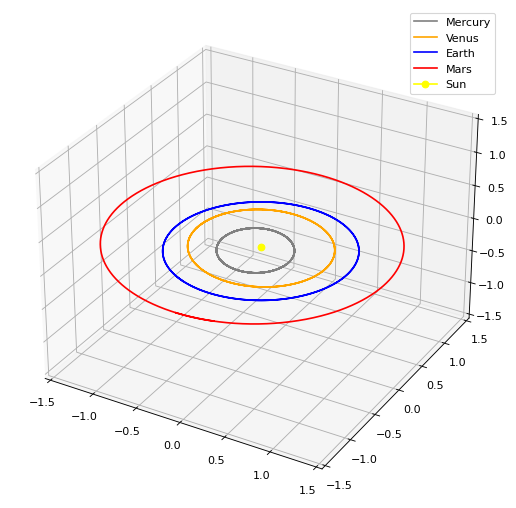

In [55]:
# Load in the data
orbits = np.load('orbits.npz')

# Split the data up into the x, y, z components for each planet.
mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']

# Create a figure object.
fig = plt.figure(figsize=(25,8),dpi=80)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

ax.plot(mercury[:,0], mercury[:,1], mercury[:,2], label='Mercury', c='grey')
ax.plot(venus[:,0], venus[:,1], venus[:,2], label='Venus', c='orange')
ax.plot(earth[:,0], earth[:,1], earth[:,2], label='Earth', c='blue')
ax.plot(mars[:,0], mars[:,1], mars[:,2], label='Mars', c='red')
ax.plot(0, 0, 0, c='yellow', label='Sun', marker='o')
ax.legend()
plt.show()


## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot, and embed you animated plot.

In [94]:
plt.ioff()

# Create a figure object.
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
mercury = orbits['mercury']
venus = orbits['venus']
earth = orbits['earth']
mars = orbits['mars']


# Create line objects to be altered dynamically.
mercury_line, = plt.plot([], [], [], c='gray', label='Mercury')
mercury_point, = plt.plot([], [], [], c='gray', marker='o')
venus_line, = plt.plot([], [], [], c='orange', label='Venus')
venus_point, = plt.plot([], [], [], c='orange', marker='o')
earth_line, = plt.plot([], [], [], c='blue', label='Earth')
earth_point, = plt.plot([], [], [], c='blue', marker='o')
mars_line, = plt.plot([], [], [], c='red', label='Mars')
mars_point, = plt.plot([], [], [], c='red', marker='o')

ax.legend()


# Create a function to update line objects.
def update(t):

    # Mercury
    mercury_line.set_data(mercury[:t+2,0], mercury[:t+2,1])
    mercury_line.set_3d_properties(mercury[:t+2,2])
    mercury_point.set_data([mercury[t,0]], [mercury[t,1]])
    mercury_point.set_3d_properties([mercury[t,2]])

    # Venus
    venus_line.set_data(venus[:t+2,0], venus[:t+2,1])
    venus_line.set_3d_properties(venus[:t+2,2])
    venus_point.set_data([venus[t,0]], [venus[t,1]])
    venus_point.set_3d_properties([venus[t,2]])

    # Earth
    earth_line.set_data(earth[:t+2,0], earth[:t+2,1])
    earth_line.set_3d_properties(earth[:t+2,2])
    earth_point.set_data([earth[t,0]], [earth[t,1]])
    earth_point.set_3d_properties([earth[t,2]])

    # Mars
    mars_line.set_data(mars[:t+2,0], mars[:t+2,1])
    mars_line.set_3d_properties(mars[:t+2,2])
    mars_point.set_data([mars[t,0]], [mars[t,1]])
    mars_point.set_3d_properties([mars[t,2]])

    return mercury_line, mercury_point, venus_line, venus_point, earth_line, earth_point, mars_line, mars_point
plt.plot(0, 0, 0, c='yellow', label='Sun', marker='o')

# Create a FuncAnimation object.
ani = FuncAnimation(fig, update, frames=range(1400), interval=17)

# render as html5 and embed
HTML(ani.to_html5_video())

/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{\det(2\pi\Sigma)}}\exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

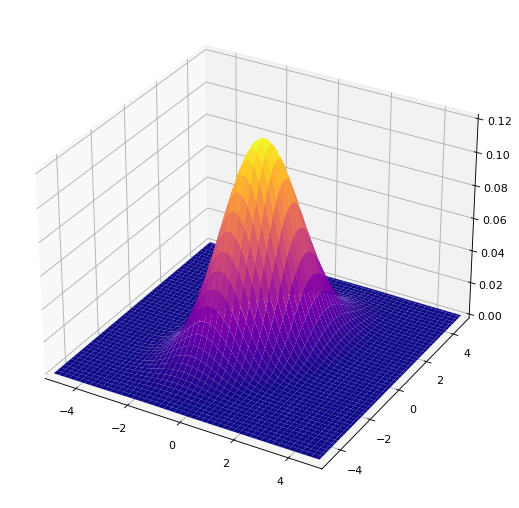

In [129]:
# Create necessary variables
sigma = np.array([[1,   3/5],
                   [3/5,   2]])
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Create a figure object.
fig = plt.figure(figsize=(25,8),dpi=80)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, .12])

# Set up our function (ignore mu because it is zero anyway).
f = lambda x: 1 / (np.sqrt(np.linalg.det(2*np.pi*sigma)))*np.exp(-0.5*x@np.linalg.inv(sigma)@(x))

# Iterate through all the points in the meshgrid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f(np.array([X[i, j], Y[i, j]]))


ax.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation and embed it in the notebook.

In [132]:
plt.ioff()

# Get the data
X = np.load('vibration.npz/X.npy')
Y = np.load('vibration.npz/Y.npy')
Z = np.load('vibration.npz/Z.npy')

# Create a figure object.
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlim([0, 2])
ax.set_ylim([0, 3])
ax.set_zlim([0, 5])

line, = ax.plot([], [], 'r-')

# Create a function to update line objects.
def update(t):
    ax.clear()
    ax.plot_surface(X, Y, Z[t], cmap='plasma')
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 3])
    ax.set_zlim([0, 5])
    return

# Create a FuncAnimation object.
ani = FuncAnimation(fig, update, frames=range(150), interval=20)

# render as html5 and embed
HTML(ani.to_html5_video())